## Visualize results from modeling for presentation and report

Inputs:
- Model 1 results: new_store_ids.csv, new_store_ids_no_existing_access.csv 
- Model 2 results: manually entered store ID (did not save csv because only one value)
- Baseline results: manually entered store ID (did not save csv because only one value)
- relevant_buildings.shp: clean building footprint file

Methodology:
1. This file produces several plots showing results from the previous analysis. Each section is titled with a description of the plot

In [5]:
# Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Avoid printing set copy warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Import building footprints
buildings_df = gpd.read_file('../processed_data/relevant_buildings.shp')

# Create ID variable
buildings_df.reset_index(drop=True, inplace=True)
buildings_df['building_id'] = buildings_df.index + 1
buildings_df['building_id'] = buildings_df.apply(lambda row: str(row['building_id']) + '-' + str(row['CLASS']) , axis=1)

#### Plotting existing access to grocery stores at 0.5 miles

<AxesSubplot:>

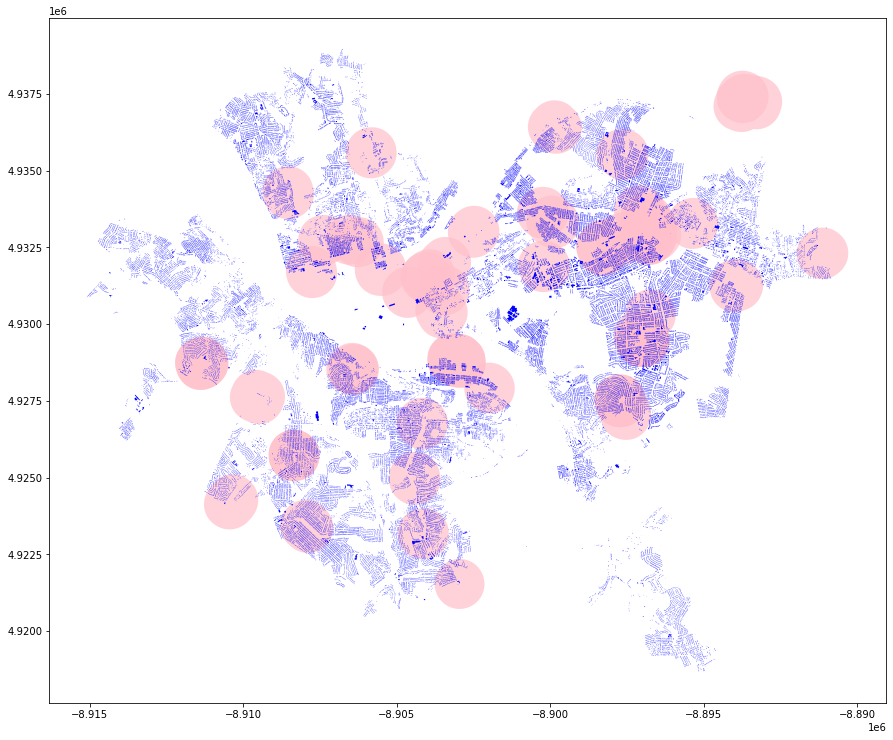

In [7]:
# Splitting up grocery stores data to add buffers
grocery_stores = buildings_df[buildings_df['class_reco'].str.contains('Grocery')]
grocery_stores['geometry'] = grocery_stores['geometry'].to_crs(epsg=3857) # converting to this CRS changes the units to meters
grocery_stores['geometry'] = grocery_stores['geometry'].buffer(804.67) # 1609 meters = 1 mile - buffering adds a buffer around the point with this radius

res_buildings = buildings_df[buildings_df['class_reco'].str.contains('Residential')]
res_buildings['geometry'] = res_buildings['geometry'].to_crs(epsg=3857)

# plotting
f, ax = plt.subplots(figsize=(15,15))
grocery_stores.plot(ax=ax, alpha=0.7, color='pink', label='Grocery stores + 0.5 mile buffer')
res_buildings.plot(ax=ax, color='blue', label='Residential buildings')

#### Plotting the first 3 stores chosen by model 1

<AxesSubplot:>

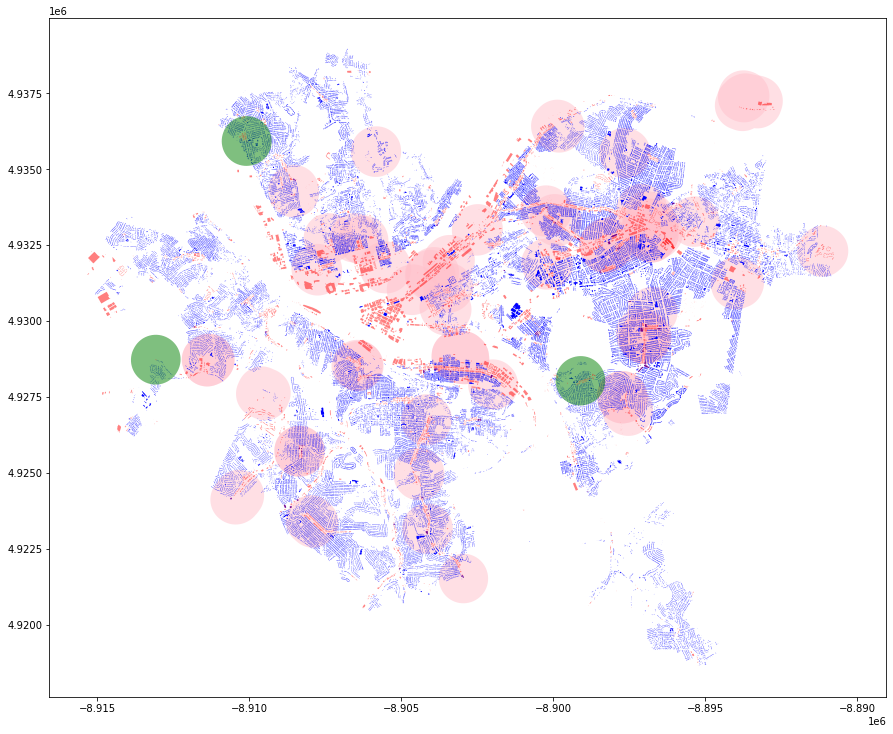

In [8]:
## Plotting results

# Read results for model 1
new_stores = pd.read_csv('../processed_data/new_store_ids.csv')
top_3 = list(new_stores['building_id'])[:3]

chosen_buildings = buildings_df[(buildings_df.building_id == top_3[0]) | (buildings_df.building_id == top_3[1]) | (buildings_df.building_id == top_3[2])]

## Plotting results

grocery_stores = buildings_df[buildings_df['class_reco'].str.contains('Grocery')]
grocery_stores['geometry'] = grocery_stores['geometry'].to_crs(epsg=3857) # converting to this CRS changes the units to meters
grocery_stores['geometry'] = grocery_stores['geometry'].buffer(804.67) # 1609 meters = 1 mile - buffering adds a buffer around the point with this radius

res_buildings = buildings_df[buildings_df['class_reco'].str.contains('Residential')]
res_buildings['geometry'] = res_buildings['geometry'].to_crs(epsg=3857)

comm_buildings = buildings_df[buildings_df['class_reco'].str.contains('commercial')]
comm_buildings['geometry'] = comm_buildings['geometry'].to_crs(epsg=3857)

chosen_buildings['geometry'] = chosen_buildings['geometry'].to_crs(epsg=3857)
chosen_buildings['geometry'] = chosen_buildings['geometry'].buffer(804.67)


# plotting
f, ax = plt.subplots(figsize=(15,15))
grocery_stores.plot(ax=ax, alpha=0.5, color='pink', label='Grocery stores + 0.5 mile buffer')
res_buildings.plot(ax=ax, color='blue', label='Residential buildings')
chosen_buildings.plot(ax=ax, alpha=0.5, color='green', label='New stores placement')
comm_buildings.plot(ax=ax, alpha=0.5, color='red', label='Commercial buildings')

### Location of existing stores + additional stores placed by Model 1 to give complete access

<AxesSubplot:>

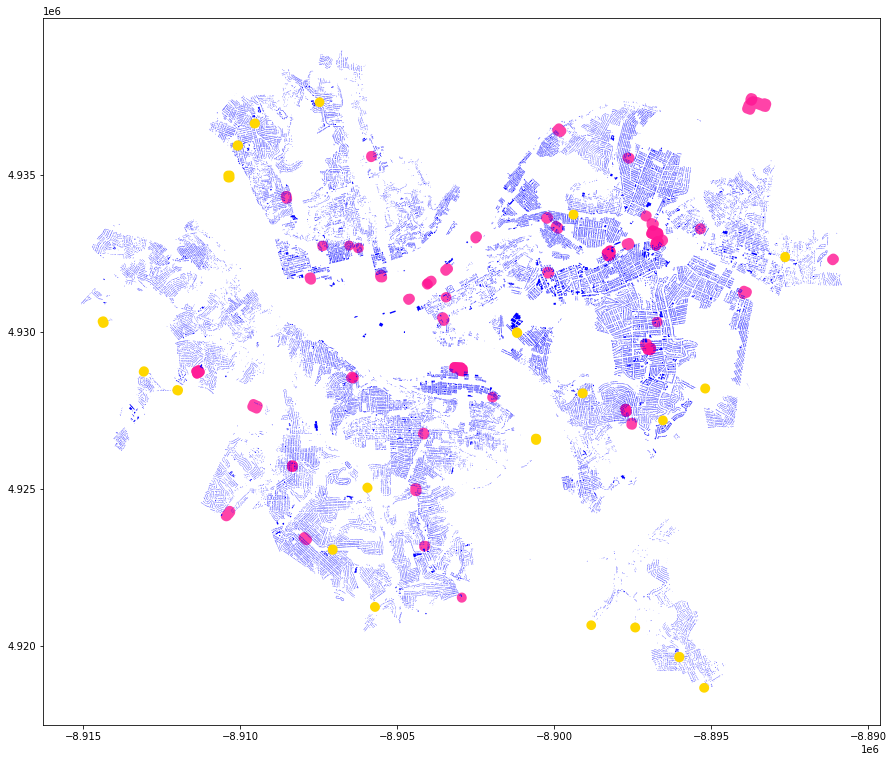

In [10]:
# All stores needed to fulfill access
chosen_buildings = buildings_df[(buildings_df.building_id.isin(new_stores.building_id))]

## Plotting results (new stores on top of existing ones)

# Read results
chosen_buildings = buildings_df[(buildings_df.building_id.isin(new_stores.building_id))]

grocery_stores = buildings_df[buildings_df['class_reco'].str.contains('Grocery')]
grocery_stores['geometry'] = grocery_stores['geometry'].to_crs(epsg=3857) # converting to this CRS changes the units to meters
grocery_stores['geometry'] = grocery_stores['geometry'].buffer(150) # 1609 meters = 1 mile - buffering adds a buffer around the point with this radius

res_buildings = buildings_df[buildings_df['class_reco'].str.contains('Residential')]
res_buildings['geometry'] = res_buildings['geometry'].to_crs(epsg=3857)


chosen_buildings['geometry'] = chosen_buildings['geometry'].to_crs(epsg=3857)
chosen_buildings['geometry'] = chosen_buildings['geometry'].buffer(150)


# plotting
f, ax = plt.subplots(figsize=(15,15))
grocery_stores.plot(ax=ax, alpha=0.8, color='deeppink', label='Grocery stores + 0.5 mile buffer')
res_buildings.plot(ax=ax, color='blue', label='Residential buildings')
chosen_buildings.plot(ax=ax, alpha=1, color='gold', label='New stores placement')


### Location of stores placed by Model 1, if we start from scratch (no existing grocery stores)

<AxesSubplot:>

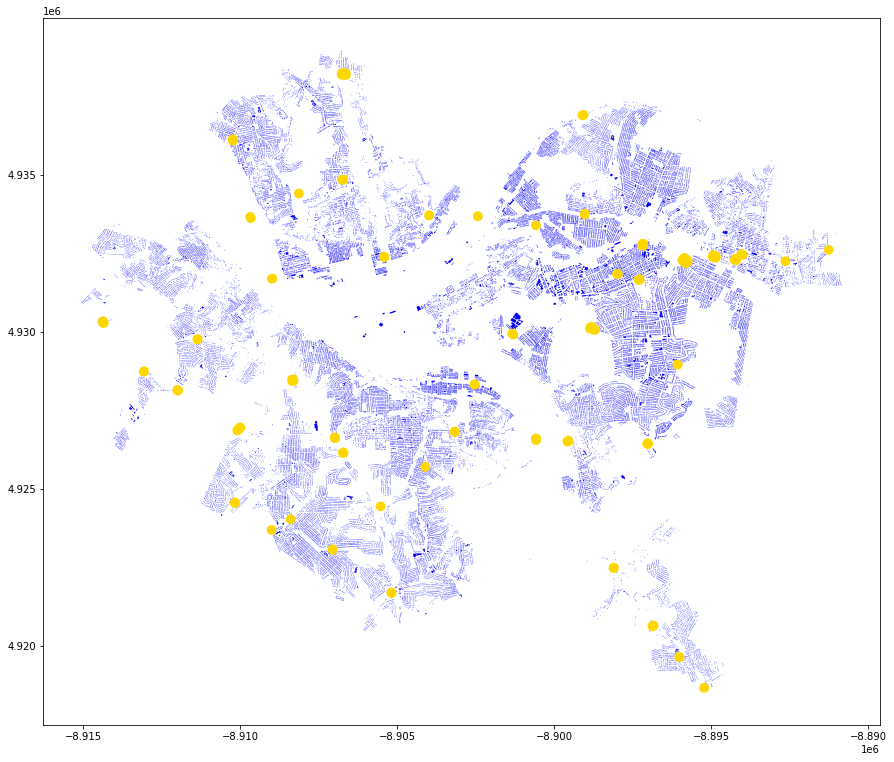

In [11]:
## Plotting results (stores from scratch)

# Read results
new_stores_from_scratch = pd.read_csv('../processed_data/new_store_ids_assuming_no_existing_access.csv')
chosen_buildings = buildings_df[(buildings_df.building_id.isin(new_stores_from_scratch.building_id))]

res_buildings = buildings_df[buildings_df['class_reco'].str.contains('Residential')]
res_buildings['geometry'] = res_buildings['geometry'].to_crs(epsg=3857)

chosen_buildings['geometry'] = chosen_buildings['geometry'].to_crs(epsg=3857)
chosen_buildings['geometry'] = chosen_buildings['geometry'].buffer(150)

# plotting
f, ax = plt.subplots(figsize=(15,15))
res_buildings.plot(ax=ax, color='blue', label='Residential buildings')
chosen_buildings.plot(ax=ax, alpha=1, color='gold', label='New stores placement')


### Comparing model 1, model 2 and baseline on 1 new store placement

<AxesSubplot:>

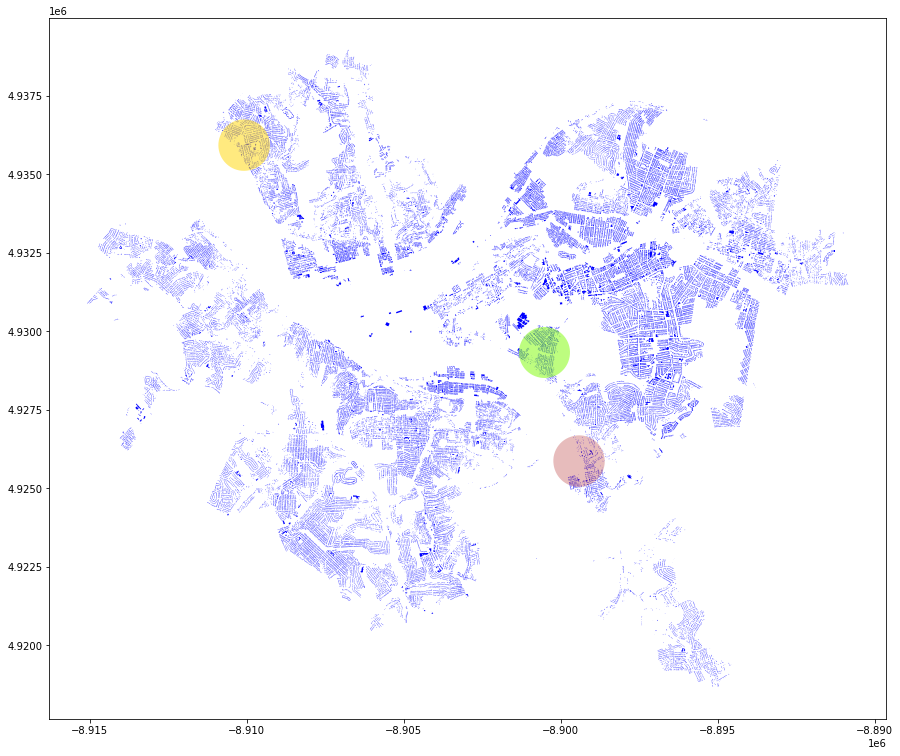

In [ ]:
#M1
m1_store = new_stores.building_id.iloc[0]
chosen_building_m1 = buildings_df[buildings_df.building_id == m1_store]

# Baseline
baseline_store = '106749-C'
chosen_building_baseline = buildings_df[buildings_df.building_id == baseline_store]

# M2
m2_store = '96061-C'
chosen_building_m2 = buildings_df[buildings_df.building_id == m2_store]

res_buildings = buildings_df[buildings_df['class_reco'].str.contains('Residential')]
res_buildings['geometry'] = res_buildings['geometry'].to_crs(epsg=3857)

chosen_building_m1['geometry'] = chosen_building_m1['geometry'].to_crs(epsg=3857)
chosen_building_m1['geometry'] = chosen_building_m1['geometry'].buffer(804.67)

chosen_building_m2['geometry'] = chosen_building_m2['geometry'].to_crs(epsg=3857)
chosen_building_m2['geometry'] = chosen_building_m2['geometry'].buffer(804.67)

chosen_building_baseline['geometry'] = chosen_building_baseline['geometry'].to_crs(epsg=3857)
chosen_building_baseline['geometry'] = chosen_building_baseline['geometry'].buffer(804.67)

# # plotting
f, ax = plt.subplots(figsize=(15,15))
res_buildings.plot(ax=ax, color='blue', label='Residential buildings')
chosen_building_m1.plot(ax=ax, alpha=0.5, color='gold', label='New stores placement')
chosen_building_m2.plot(ax=ax, alpha=0.3, color='firebrick', label='New stores placement')
chosen_building_baseline.plot(ax=ax, alpha=0.5, color='lawngreen', label='New stores placement')
